# King House Prices Project

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

In [6]:
pd.options.display.float_format = '{:.2f}'.format # outputlardaki bilimsel yani e^3 gibi gösterimi kapattım. 
#virgülden sonra 2 digit görünüyor

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [9]:
df.isnull().sum() # null değer yok süper

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

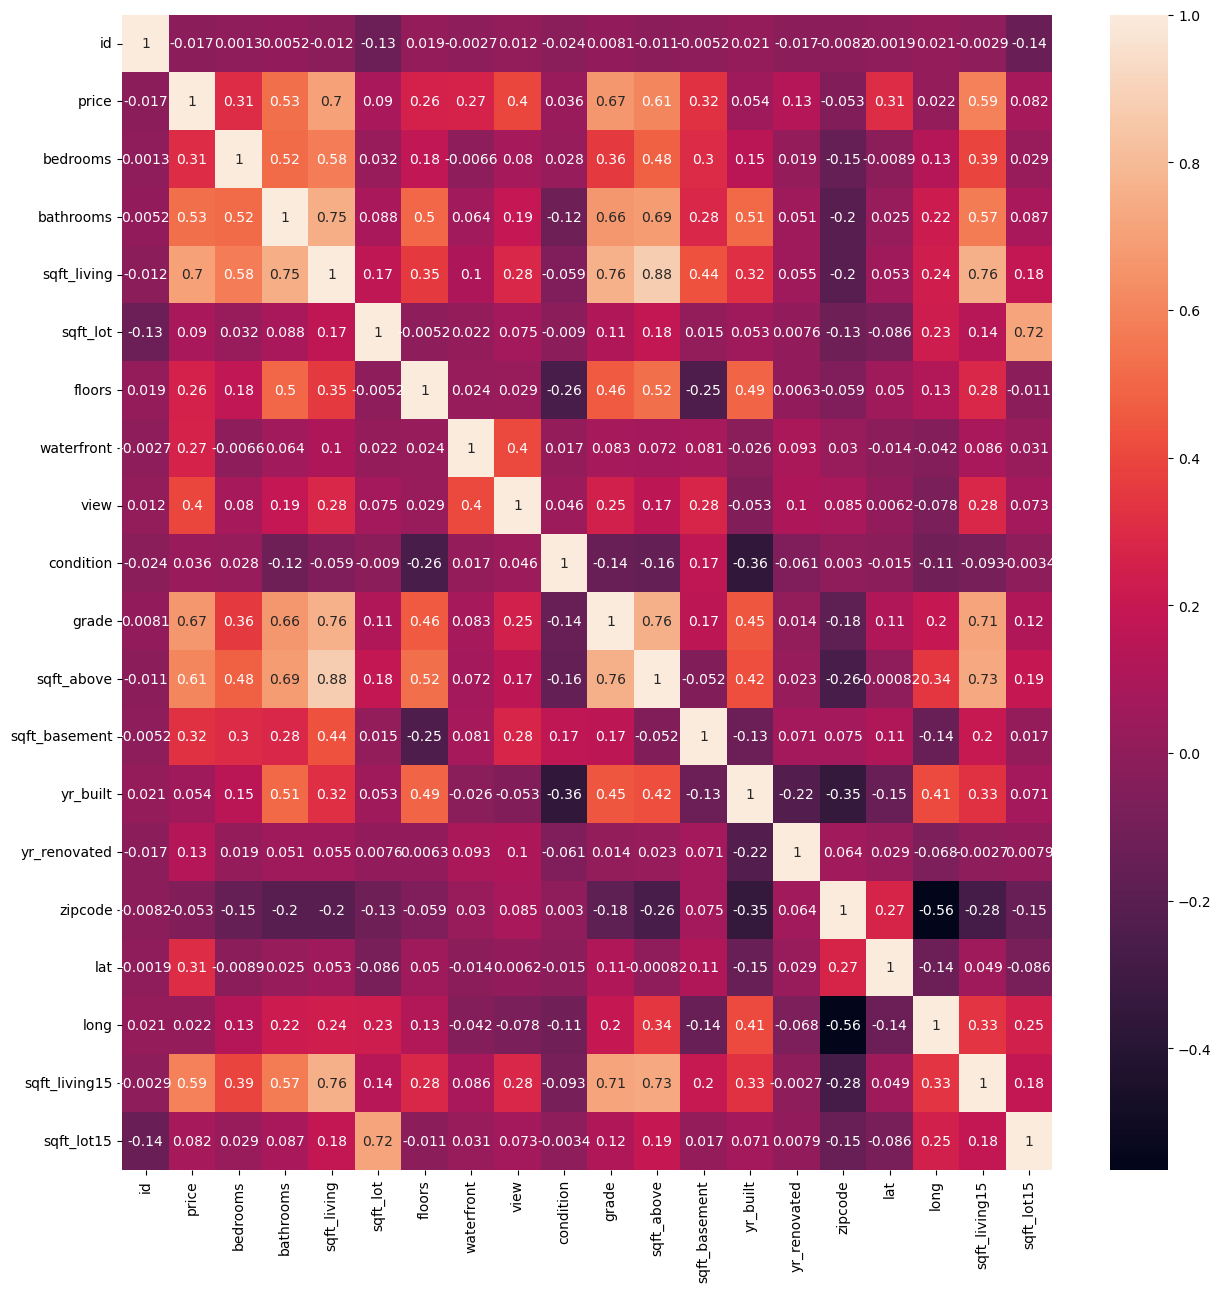

In [10]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

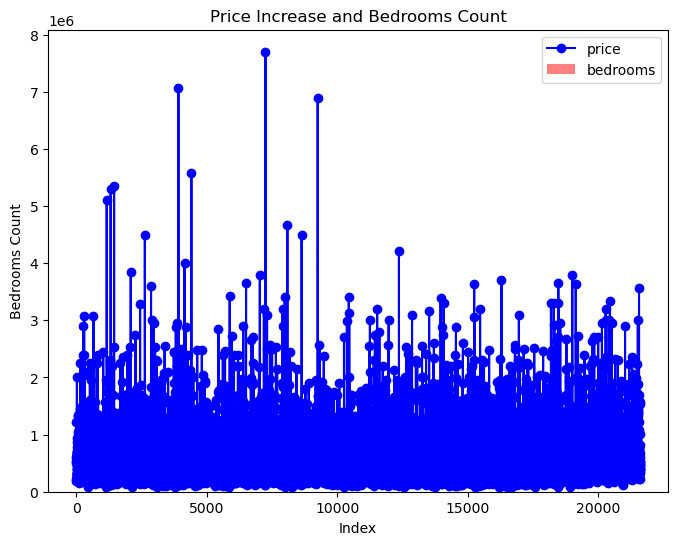

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(df['price'], color='blue', marker='o', label='price')
plt.ylabel('price')
plt.bar(df.index, df['bedrooms'], color='red', alpha=0.5, label='bedrooms')
plt.xlabel('Index')
plt.ylabel('Bedrooms Count')
plt.title('Price Increase and Bedrooms Count')
plt.legend()
plt.show()

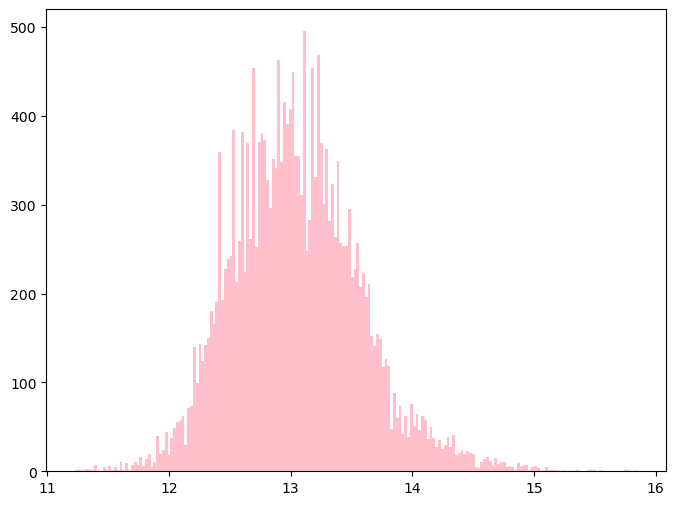

In [12]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)) , color="pink", bins=200);

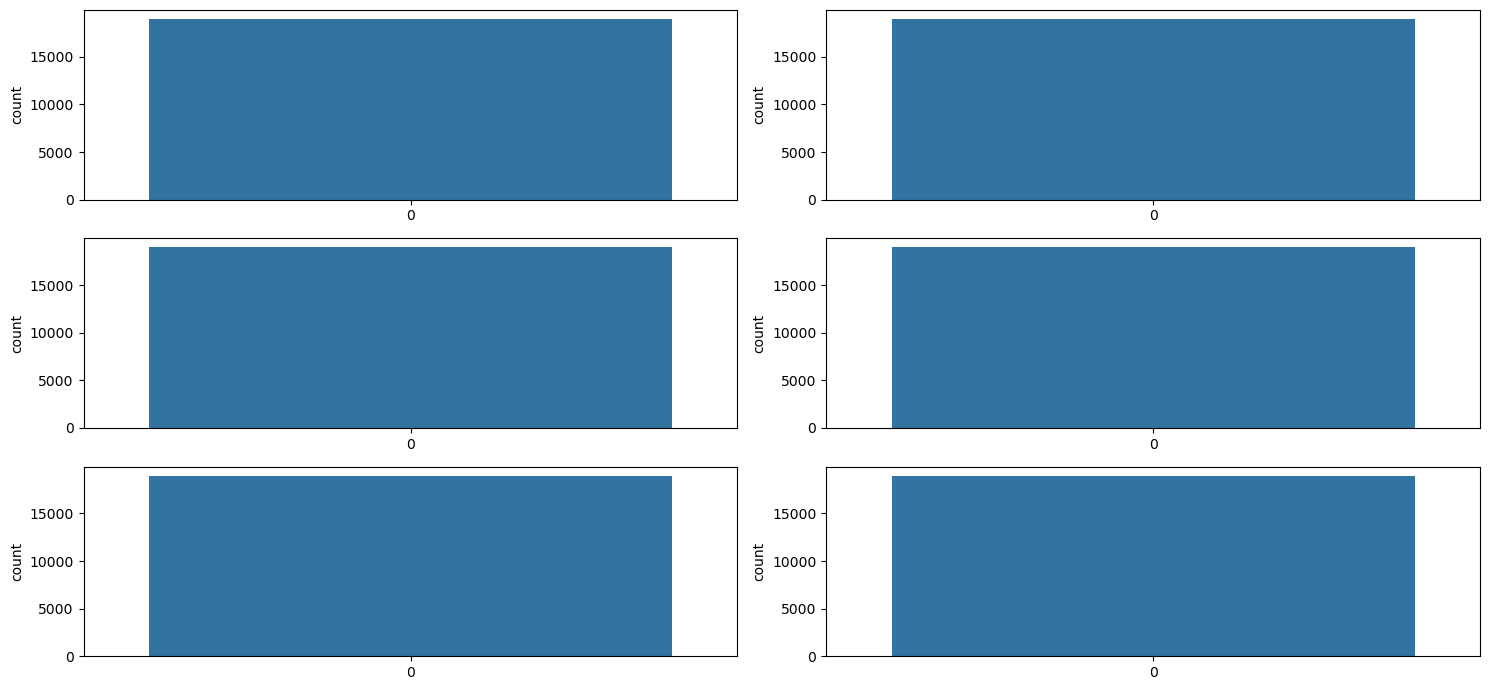

In [41]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(3,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(3,2,2)
sns.countplot(df['floors'])
fig.add_subplot(3,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(3,2,4)
sns.countplot(df['grade'])
fig.add_subplot(3,2,5)
sns.countplot(df['view'])
fig.add_subplot(3,2,6)
sns.countplot(df['condition'])
plt.tight_layout()

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

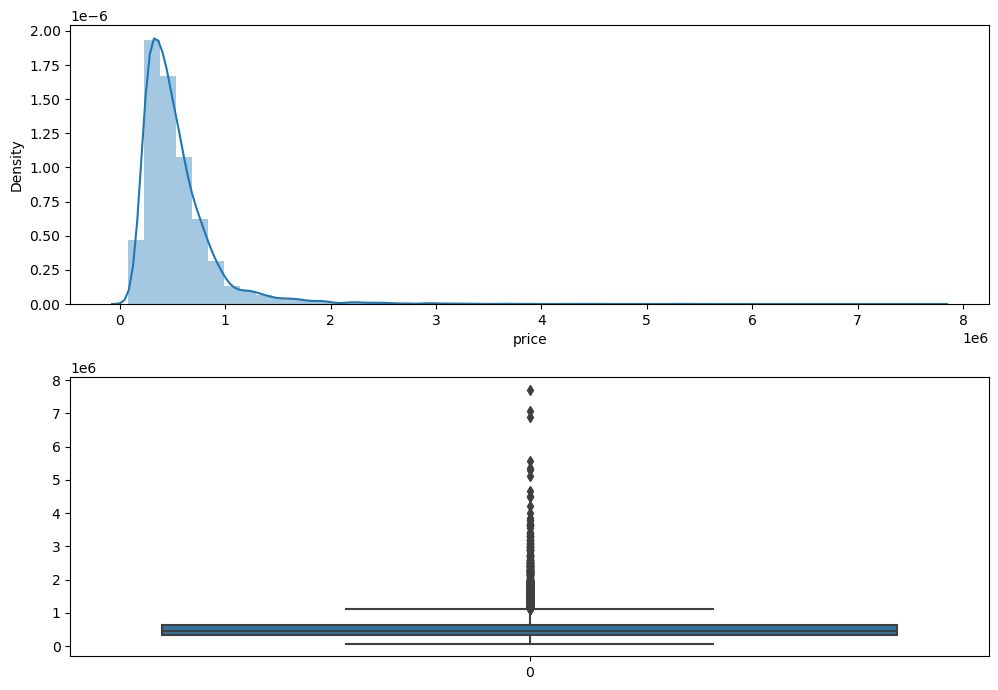

In [15]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout();

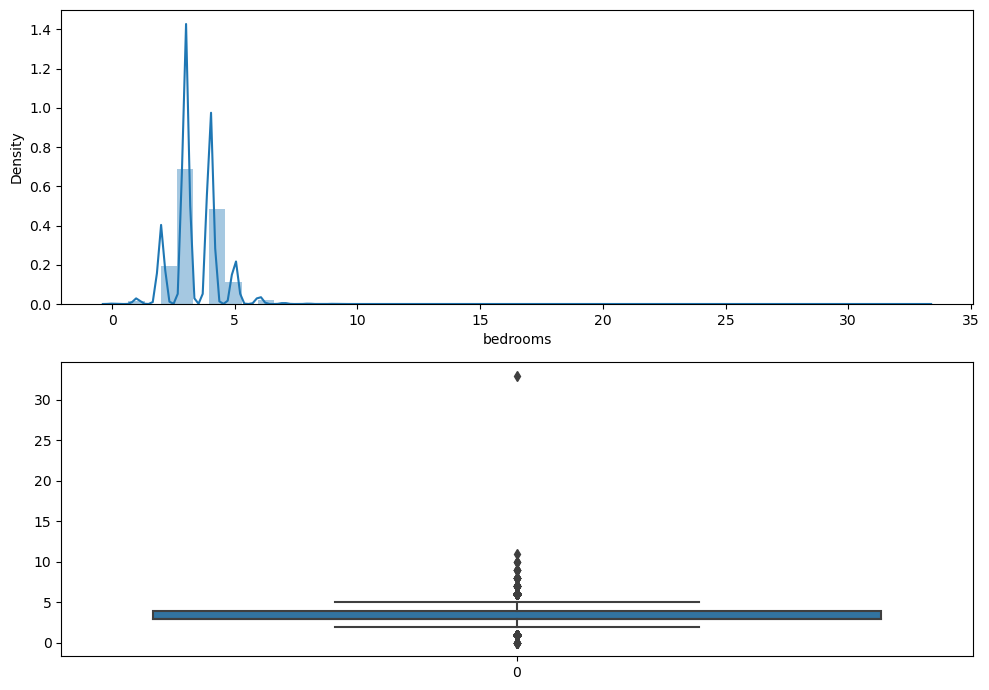

In [16]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['bedrooms'])
fig.add_subplot(2,1,2)
sns.boxplot(df['bedrooms'])
plt.tight_layout();

In [17]:
numb_house_wrt_bedrooms = df['bedrooms'].value_counts()

print(numb_house_wrt_bedrooms)

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [18]:
oda_sayisi = 7 

# Belirli oda sayısına sahip örnekleri silme
df = df[df['bedrooms'] < oda_sayisi]

print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000 221900.00         3       1.00   
1      6414100192  20141209T000000 538000.00         3       2.25   
2      5631500400  20150225T000000 180000.00         2       1.00   
3      2487200875  20141209T000000 604000.00         4       3.00   
4      1954400510  20150218T000000 510000.00         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000 360000.00         3       2.50   
21609  6600060120  20150223T000000 400000.00         4       2.50   
21610  1523300141  20140623T000000 402101.00         2       0.75   
21611   291310100  20150116T000000 400000.00         3       2.50   
21612  1523300157  20141015T000000 325000.00         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650    1.00           0     0          3      7   
1             2570 

In [19]:
oda_sayisi = 0 

# Belirli oda sayısına sahip örnekleri silme
df = df[df['bedrooms'] != oda_sayisi]

print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000 221900.00         3       1.00   
1      6414100192  20141209T000000 538000.00         3       2.25   
2      5631500400  20150225T000000 180000.00         2       1.00   
3      2487200875  20141209T000000 604000.00         4       3.00   
4      1954400510  20150218T000000 510000.00         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000 360000.00         3       2.50   
21609  6600060120  20150223T000000 400000.00         4       2.50   
21610  1523300141  20140623T000000 402101.00         2       0.75   
21611   291310100  20150116T000000 400000.00         3       2.50   
21612  1523300157  20141015T000000 325000.00         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650    1.00           0     0          3      7   
1             2570 

In [20]:
numb_house_wrt_bedrooms = df['bedrooms'].value_counts()

print(numb_house_wrt_bedrooms)

3    9824
4    6882
2    2760
5    1601
6     272
1     199
Name: bedrooms, dtype: int64


In [21]:
df['zipcode']=df['zipcode'].astype("category")

In [22]:
df=df[df['bathrooms']<5]

In [23]:
df['bedrooms']=df['bedrooms']**2 

In [24]:
df['age']=2022-df['yr_built']

In [25]:
df['bathrooms']=df['bathrooms']**2

In [26]:
import numpy as np
df['basement']= np.where(df['sqft_basement']>0, 1, 0)
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)

In [27]:
df.quantile(.97).astype('int')

id               9477100996
price               1352849
bedrooms                 25
bathrooms                12
sqft_living            4070
sqft_lot              66233
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3650
sqft_basement          1320
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3550
sqft_lot15            51400
age                     112
basement                  1
renovated                 1
Name: 0.97, dtype: int64

In [28]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [29]:
x = df[['bedrooms','bathrooms','sqft_living','grade','zipcode','view','basement','waterfront','floors','age','renovated','condition','sqft_above']]

In [30]:
y=df[["price"]]

In [31]:
x=pd.get_dummies(x,drop_first=True)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15172, 81), (3794, 81), (15172, 1), (3794, 1))

In [34]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [35]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.83,91429.69,63477.09
Linear,0.83,92263.55,65944.74
Lasso,0.83,92273.89,65948.90
Ridge,0.82,92535.38,66155.86
Gradient Boosting,0.75,110175.19,82554.33
Extra Tree,0.65,130105.30,87966.41
ElasticNet,0.56,147247.43,112130.27


In [36]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [37]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [38]:
# chart_regression(pred.flatten(),y_test.flatten())

In [40]:
# Özellik önem sıralamasını almak
importance = model.feature_importances_

# Özellik önem sıralamasını gösteren DataFrame'i oluşturma
feature_importance_df = pd.DataFrame({'features': x.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Özellik önem sıralamasını ekrana bastırma
print(feature_importance_df)


         features  Importance
14  zipcode_98004        0.04
24  zipcode_98023        0.04
3           grade        0.04
51  zipcode_98092        0.04
43  zipcode_98058        0.04
..            ...         ...
9       renovated        0.00
7          floors        0.00
27  zipcode_98028        0.00
38  zipcode_98045        0.00
0        bedrooms        0.00

[81 rows x 2 columns]
